In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

# **Load Data and Pre-processing**

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#this link
file_id = '1u8Hoxlxvu6E0KJAoSNS2q3rLnIbRwe7-'

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('AG.txt')

In [5]:
df = pd.read_csv("AG.txt", sep="\t", lineterminator='\n', escapechar='\\', quoting=3,
    quotechar='"', encoding = "ISO-8859-1", header=None,
    names=['source', 'url', 'title', 'image', 'category', 'description', 'rank', 'pubdate','video'],
)

In [6]:
df.shape

(1281103, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281103 entries, 0 to 1281102
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   source       1281103 non-null  object
 1   url          1281103 non-null  object
 2   title        1281098 non-null  object
 3   image        980975 non-null   object
 4   category     1281103 non-null  object
 5   description  1281087 non-null  object
 6   rank         1281103 non-null  int64 
 7   pubdate      1281103 non-null  object
 8   video        1281103 non-null  object
dtypes: int64(1), object(8)
memory usage: 88.0+ MB


<Axes: xlabel='category'>

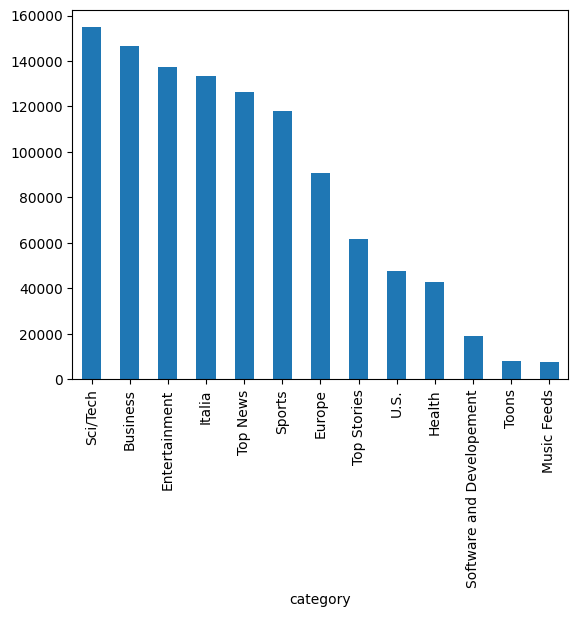

In [8]:
df.groupby('category').size().sort_values(ascending=False)[1:].plot(kind='bar')

<Axes: xlabel='category'>

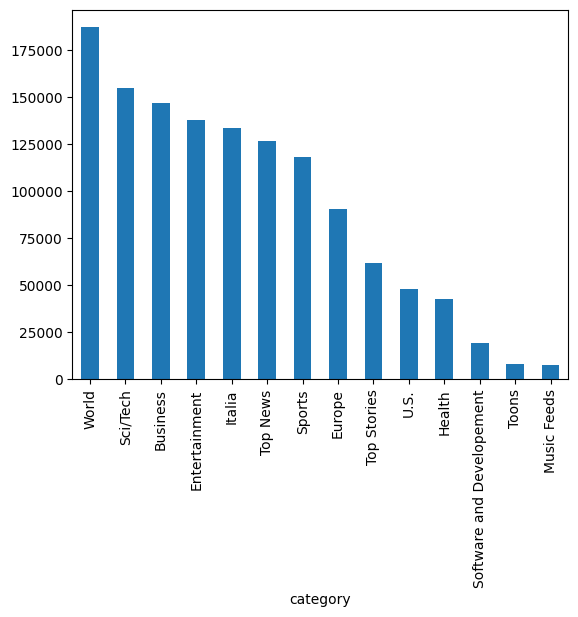

In [9]:
df.groupby('category').size().sort_values(ascending=False).plot(kind='bar')

In [10]:
df.sample(5)

,source,url,title,image,category,description,rank,pubdate,video
1137151,Boston Globe sports,http://www.nytimes.com/2007/12/22/sports/ncaabasketball/22hoops.html?ex=1355979600&en=af94c3e6952d7954&ei=5090&partner=rssuserland&emc=rss,"Menâs Roundup: Holding Off Late Run, Rider Upends Rutgers",http___graphics8.nytimes.com_images_2007_12_20_arts_21moth-mahn.jpg.gif,Sports,Harris Mansell scored 15 points â including the go-ahead basket in the final minute â to give Rider a 61-57 victory at Rutgers on Friday night.,5,2007-12-22 08:01:19,N
785960,CNET networking news,http://news.com.com/News.com+Extra/2001-9373_3-0.html?tag=rsspr.6157607,Cell phone giants start courting coders.,none,Sci/Tech,"Also: High security built right into $100 laptop's OS. Read these stories and more from around the Web at News.com Extra.<img class=""0"" src=""http://adlog.com.com/adlog/i/r=7807&s=646536t=-1&decache=6157213&o=1:&h=cn&p=2&b=1&l=en_US&site=1/http://i.i.com.com/cnwk.1d/Ads/common/dotclear.gif"" height=""1"" width=""1"" border=""0"" alt="""" /><img class=""rss-ad"" src=""http://adlog.com.com/adlog/i/r=7807&s=661312t=-1&decache=6157213&o=1:&h=cn&p=2&b=1&l=en_US&site=1/http://i.i.com.com/cnwk.1d/Ads/common/dotclear.gif"" height=""1"" width=""1"" border=""0"" alt="""" />",3,2007-02-08 21:56:27,N
725266,Washington Post Nation,http://www.washingtonpost.com/wp-dyn/content/article/2006/12/02/AR2006120201016.html?nav=rss_nation,Order Shows FEMA Aid Shortcomings,http___media.washingtonpost.com_wp-srv_nation_graphics_aDevastatingSeason.gif.gif,U.S.,"In denouncing the way the Bush administration has denied aid to tens of thousands of victims of hurricanes Katrina and Rita, a federal judge in Washington last week pulled back the curtain on a deeper mystery 15 months after the nation's costliest natural disaster:",5,2006-12-05 06:04:17,N
1046853,New York Times world,http://www.nytimes.com/2007/09/13/nyregion/13eldridge.html?ex=1347336000&en=97de602ecb29bce9&ei=5090&partner=rssuserland&emc=rss,Synagogue Window Returns for Rosh Hashana,none,World,"At the Eldridge Street Synagogue on the Lower East Side, a special window returns just in time for Rosh Hashana.",5,2007-09-13 15:54:23,N
775553,Ansa Calcio,http://www.ansa.it/site/notizie/awnplus/economia/news/2007-02-05_10532542.html,Ryanair: utile trimestre +30%,http___www.ansa.it_site_notizie_awnplus_economia_low_c770e50c660bb575e3edc1a6e2188d2b.jpg.gif,Italia,La compagnia aerea ha totalizzato vendite pari a 493 milioni,5,2007-02-05 10:22:19,N


In [11]:
df.category.value_counts()

World                        186896
Sci/Tech                     154869
Business                     146651
Entertainment                137437
Italia                       133428
Top News                     126514
Sports                       118131
Europe                        90573
Top Stories                   61579
U.S.                          47707
Health                        42629
Software and Developement     19041
Toons                          8016
Music Feeds                    7632
Name: category, dtype: int64

In [12]:
#3.3.3.1 drop unnecessary columns and filter categories
df1 = df[['title', 'description', 'category']]
df1 = df1[df1.category.isin(['Sci/Tech', 'World', 'Business', 'Sports', 'Entertainment'])]
print("After dropping columns and filter categories dataset shape\n", df1.shape)

After dropping columns and filter categories dataset shape
 (743984, 3)


In [13]:
df1.sample(7)

,title,description,category
171562,PalmSource unveils Cobalt OS,Phone-friendly for fast Wi-Fi data,Sci/Tech
112693,Cards Close on Title,The Cardinals take one step closer to the NL Central championship with a 4-2 victory over the Houston Astros on Wednesday.,Sports
901647,"Children's Place, Disney unit settle store dispute",NEW YORK (Reuters) - Children's Place Retail Stores Inc. said on Friday that it settled a dispute with a Walt Disney Co. unit regarding its license to operate the Disney Store retail chain in North America.,Business
285817,Reports: Gators Football Coach Zook Fired (AP),"AP - Florida coach Ron Zook was fired Monday but will be allowed to finish the season, athletic director Jeremy Foley told The Gainesville Sun.",Sports
1273049,GDC 2008: Gaming's Futurama Forum,"Mind control, game announcements, and graphics cards--the gaming elite flocks to the annual Game Developers Conference to discuss what you'll play in 2008.\n<p><a href=""http://feeds.pcworld.com/~a/pcworld/latestnews?a=EQSgzg""><img src=""http://feeds.pcworld.com/~a/pcworld/latestnews?i=EQSgzg"" border=""0""></img></a></p><div class=""feedflare"">\n<a href=""http://feeds.pcworld.com/~f/pcworld/latestnews?a=cpY1A3E""><img src=""http://feeds.pcworld.com/~f/pcworld/latestnews?i=cpY1A3E"" border=""0""></img></a> <a href=""http://feeds.pcworld.com/~f/pcworld/latestnews?a=cPoXFfe""><img src=""http://feeds.pcworld.com/~f/pcworld/latestnews?i=cPoXFfe"" border=""0""></img></a> <a href=""http://feeds.pcworld.com/~f/pcworld/latestnews?a=bllmJVe""><img src=""http://feeds.pcworld.com/~f/pcworld/latestnews?i=bllmJVe"" border=""0""></img></a> <a href=""http://feeds.pcworld.com/~f/pcworld/latestnews?a=a1nVQpE""><img src=""http://feeds.pcworld.com/~f/pcworld/latestnews?i=a1nVQpE"" border=""0""></img></a> <a href=""http://feeds.pcworld.com/~f/pcworld/latestnews?a=YSNuO6E""><img src=""http://feeds.pcworld.com/~f/pcworld/latestnews?i=YSNuO6E"" border=""0""></img></a> <a href=""http://feeds.pcworld.com/~f/pcworld/latestnews?a=vQAoyBe""><img src=""http://feeds.pcworld.com/~f/pcworld/latestnews?i=vQAoyBe"" border=""0""></img></a>\n</div><img src=""http://feeds.pcworld.com/~r/pcworld/latestnews/~4/236364348"" height=""1"" width=""1""/>",Sci/Tech
1233884,Western Union Earnings Up 12 Percent,The money transfer company said fourth-quarter earnings rose to $243.3 million on transaction fee growth and improved foreign exchange revenue.,Business
484179,Firm looks to acquire Jersey&#39;s top utility,"Public Service Enterprise Group, a heavyweight in setting public policy and promoting economic development in the state, is in talks to be acquired by a giant Chicago gas and electric company",Business


In [14]:
#3.3.3.2 inspect and handle missing values

In [15]:
missing_stats = pd.concat([df1.isnull().sum(), df1.isnull().sum()*100/len(df1)], axis=1, keys=['count', 'percentage'])
print("missing values statistics\n\n",missing_stats)

missing values statistics

              count  percentage
title            5    0.000672
description     15    0.002016
category         0    0.000000


In [16]:
df2 = df1.dropna().reset_index(drop=True)
print(df2.shape)

(743964, 3)


In [17]:
#3.3.3.3 check if there's duplicated values
df_duplicated = df2[df2.duplicated()]
print(len(df_duplicated))

80438


In [18]:
t = df2.loc[34124, 'title']
df2[df2.title==t]

,title,description,category
34053,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Sports
34074,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Sports
34087,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Entertainment
34111,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Entertainment
34124,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Sports


In [19]:
df3 = df2.drop_duplicates().reset_index(drop=True)

In [20]:
df3[df3.title==t]

,title,description,category
30574,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Sports
30605,Athens closes 2004 Olympic Summer Games with pride and relief,"ATHENS (CP) - With pride and relief, Athens bid farewell to its guests from 201 countries at the close of the 2004 Olympic Games on Sunday.",Entertainment


In [21]:
print('Data set size before handling duplicates:', len(df2))
print('Data set size after handling duplicates :', len(df3))

Data set size before handling duplicates: 743964
Data set size after handling duplicates : 663526


In [22]:
#3.3.3.4 check for special characters
df4 = df3.copy()
for i in df4.columns:
  df4[i] = df4[i].apply(lambda x: x.replace('\n', ' '))

In [23]:
df4['description'] = df4['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

<ipython-input-23-474ed7eb6b19>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df4['description'] = df4['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [24]:
#deal w target imbalance
df5 = df4.copy()
cat_count = df5.category.value_counts()

In [25]:
cat_length = cat_count.loc['Sports']
for i in cat_count.index:
  n_drop = cat_count.loc[i] - cat_length
  random_drop = np.random.choice(df5[df5.category==i].index, n_drop, replace=False)
  df5.drop(random_drop, inplace=True)
df5.reset_index(drop=True)

,title,description,category
0,Wall St. Pullback Reflects Tech Blowout (Reuters),"Reuters - Wall Street's long-playing drama, ""Waiting for Google,"" is about to reach its final act, but its stock market debut is ending up as more of a nostalgia event than the catalyst for a new era.",Business
1,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.",Business
2,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market.",Business
3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.,Business
4,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",Business
...,...,...,...
546780,Crocs Chokes... Again,Another shoe drops.,Business
546781,The Century Mark,Give CAPS players who score 100 points in 100 days their due.,Business
546782,Crisp prefers trade to bench (AP),"AP - Coco Crisp, who lost his center field job to rookie Jacoby Ellsbury in the postseason, said Wednesday he'd probably talk to the Boston Red Sox about trading him if it appears he won't get his starting job back.",Sports
546783,Funk in high spirits for title defense,MEXICO CITY (Reuters) - Holder Fred Funk is in confident mood for this week's Mayakoba Classic where he will be bidding to become the second oldest winner in PGA Tour history.,Sports


In [26]:
df4.category.value_counts()

World            168864
Sci/Tech         136485
Business         132117
Entertainment    116703
Sports           109357
Name: category, dtype: int64

In [27]:
print(df5.shape)
print("\n\n\n")
print(df5['category'].value_counts())

(546785, 3)




Business         109357
Sci/Tech         109357
Entertainment    109357
Sports           109357
World            109357
Name: category, dtype: int64


In [28]:
#3.3.1.6 concat title to description to make content
df6 = df5.copy()
df6['content'] = df6['title'] + ' ' + df6['description']
del df6['title']
del df6['description']
df6.head()

,category,content
0,Business,"Wall St. Pullback Reflects Tech Blowout (Reuters) Reuters - Wall Street's long-playing drama, ""Waiting for Google,"" is about to reach its final act, but its stock market debut is ending up as more of a nostalgia event than the catalyst for a new era."
1,Business,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again."
2,Business,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market."
3,Business,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
5,Business,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [29]:
from google.colab import files
# path = 'https://drive.google.com/drive/u/1/folders/1CzsPsnatthjNDCYSLtyKUGK3Uf1VpmX9'

# with open(path, 'w', encoding='utf-8-sig') as f:
#   df5.to_csv(f)

# **TRANSFORMING**


In [30]:
pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00


In [31]:
import transformers
from transformers import BertModel, BertTokenizer
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
import torch
from torch.utils.data import Dataset, DataLoader
from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split

In [32]:
preprocessed_df = df6.copy()
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546785 entries, 0 to 663525
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  546785 non-null  object
 1   content   546785 non-null  object
dtypes: object(2)
memory usage: 12.5+ MB


In [33]:
label_map = {
    'Business':0,
    'Sci/Tech':1,
    'Entertainment':2,
    'Sports': 3,
    'World':4
}

In [34]:
preprocessed_df['category'] = preprocessed_df['category'].map(label_map)

In [35]:
preprocessed_df.reset_index(drop=True, inplace=True)

In [36]:
preprocessed_df.head()

,category,content
0,0,"Wall St. Pullback Reflects Tech Blowout (Reuters) Reuters - Wall Street's long-playing drama, ""Waiting for Google,"" is about to reach its final act, but its stock market debut is ending up as more of a nostalgia event than the catalyst for a new era."
1,0,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again."
2,0,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market."
3,0,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
4,0,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


**BERT**

In [ ]:
pre_trained_model_name = 'bert-base-uncased'
bert_tokenizer = BertTokenizer.from_pretrained(pre_trained_model_name)

In [ ]:
def preprocess_function(data):
    return bert_tokenizer(data["text"], truncation=True, max_length=512, add_special_tokens=True,
            return_token_type_ids=False,
            padding="max_length",
            return_attention_mask=True,
            return_tensors='pt')

In [ ]:
preprocessed_df.rename(columns={'category': 'label', 'content':'text'},inplace=True)

In [ ]:
preprocessed_df1 = Dataset.from_pandas(preprocessed_df)

In [ ]:
tokenized_df = preprocessed_df1.map(preprocess_function, batched=True)

Map:   0%|          | 0/546785 [00:00<?, ? examples/s]

In [ ]:
tokenized_df.to_csv('tokenized_df.csv', index=False)

**RoBERTa**

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig

In [ ]:
pre_trained_model_name = 'roberta-base'
roberta_tokenizer = RobertaTokenizer.from_pretrained(pre_trained_model_name)

In [ ]:
def preprocess_function(data):
    return roberta_tokenizer(data["text"], truncation=True, max_length=512, add_special_tokens=True,
            return_token_type_ids=False,
            padding="max_length",
            return_attention_mask=True,
            return_tensors='pt')

In [ ]:
roberta_tokenized_df = preprocessed_df1.map(preprocess_function, batched=True)

Map:   0%|          | 0/546785 [00:00<?, ? examples/s]

**ERNIE**

In [ ]:
from transformers import ErnieConfig, ErnieModel, ErnieForSequenceClassification
from transformers import AutoTokenizer, AutoModel

ernie_tokenizer = AutoTokenizer.from_pretrained("nghuyong/ernie-2.0-base-en")
model = AutoModel.from_pretrained("nghuyong/ernie-2.0-base-en")

In [ ]:
def preprocess_function(data):
    return ernie_tokenizer(data["text"], truncation=True, max_length=512, add_special_tokens=True,
            return_token_type_ids=False,
            padding="max_length",
            return_attention_mask=True,
            return_tensors='pt')

In [ ]:
ernie_tokenizer_df = preprocessed_df1.map(preprocess_function, batched=True)

Map:   0%|          | 0/546785 [00:00<?, ? examples/s]